In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [14]:
df = pd.read_csv('bags_page_info.csv')

In [ ]:
df

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              912 non-null    object 
 1   Brand              795 non-null    object 
 2   Price              795 non-null    float64
 3   Condition          794 non-null    object 
 4   Retail_Price       438 non-null    float64
 5   Volume             795 non-null    float64
 6   Exterior Color     795 non-null    object 
 7   Exterior Material  795 non-null    object 
 8   Interior Color     794 non-null    object 
 9   Interior Material  793 non-null    object 
 10  Accessories        912 non-null    object 
dtypes: float64(3), object(8)
memory usage: 78.5+ KB


In [30]:
l=[]
len(l)

0

In [58]:
l=[]
for el in df.Accessories:
    if el == "[]":
        df.Accessories=0

In [59]:
df

,Brand,Price,Condition,Retail_Price,Volume,Exterior Color,Exterior Material,Interior Color,Interior Material,Accessories
Title,,,,,,,,,,
Chanel Boy Flap Bag Quilted Caviar Old Medium,Chanel,4815.0,Pristine,NaN,165.0,Pink,Leather,Pink,Fabric,0
Chanel Coco Top Handle Bag Quilted Caviar Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Christian Dior Saddle Handbag Oblique Canvas Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Prada Promenade Bag Saffiano Leather Mini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Christian Dior Saddle Handbag Oblique Canvas Mini,Christian Dior,3390.0,Excellent,NaN,96.0,Blue,Canvas (Plain),Neutral,Fabric,0
...,...,...,...,...,...,...,...,...,...,...
Prada Double Zip Lux Tote Saffiano Leather Medium,Prada,905.0,Very Good,2390.0,729.0,Black,Leather,Black,Fabric,0
Louis Vuitton Keepall Bag Monogram Canvas 55,Louis Vuitton,1060.0,Great,1600.0,2508.0,Brown,Canvas (Coated),Brown,Fabric,0
Salvatore Ferragamo Briana Tote Saffiano Leather Small,Salvatore Ferragamo,330.0,Good,1290.0,495.0,Pink,Leather,Pink,Fabric,0


In [55]:
l=[]
for el in df.Accessories:
    el=el[1:-1]
    l = el.split(',')
    if (len(l))==1:
        if l[0]=="''":
            el = None
    print(l)
    print(len(l))
    #print(len(el))
   # if len(el)==0:
    #    df.loc['Accessories'] = 0

["'Box'", " 'Dust bag'", " 'Authenticity card'"]
3
['']
1
['']
1
['']
1
["'No accessories'"]
1
['']
1
["'Mirror'", " 'Dust bag'", " 'Detachable Strap missing'"]
3
["'Extra Bag'", " 'Extra Strap'", " 'Pochette'", " 'Box'", " 'Dust bag'", " 'Detachable Strap'"]
6
["'No accessories'"]
1
["'Clochette'", " 'Keys'", " 'Lock'", " 'Detachable Strap'"]
4
["'Authenticity card'"]
1
["'Authenticity card'"]
1
["'Dust bag'", " 'Detachable Strap'"]
2
["'Extra Bag'", " 'Extra Strap'", " 'Pochette'", " 'Dust bag missing'", " 'Detachable Strap'"]
5
["'Dust bag'", " 'Detachable Strap'"]
2
["'Dust bag'", " 'Pochette missing'", " 'Box'", " 'Authenticity card'"]
4
["'No accessories'"]
1
["'Box'", " 'Dust bag'", " 'Detachable Strap'"]
3
["'Dust bag'"]
1
["'Box'", " 'Dust bag'", " 'Authenticity card'"]
3
["'No accessories'"]
1
["'Authenticity card'"]
1
["'Pochette'", " 'Dust bag'", " 'Detachable Strap missing'"]
3
['']
1
["'Mirror'", " 'Authenticity card'", " 'Dust bag'", " 'Box'"]
4
["'Authenticity card'", "

2
["'Detachable Strap'"]
1
["'No accessories'"]
1
["'Dust bag'"]
1
['']
1
["'Clochette'", " 'Keys'", " 'Lock'", " 'Box'", " 'Dust bag'", " 'Detachable Strap'"]
6
["'Box'", " 'Dust bag'"]
2
["'Dust bag'", " 'Detachable Strap missing'"]
2
["'Clochette'", " 'Keys'", " 'Lock'", " 'Dust bag'"]
4
["'Mirror'", " 'Dust bag'"]
2
["'Box'", " 'Detachable Strap'"]
2
["'No Accessories'", " 'Detachable Strap'"]
2
["'Keys missing'", " 'Lock missing'"]
2
["'Authenticity card'"]
1
["'Dust bag'"]
1
["'Authenticity card'"]
1
["'Dust bag'", " 'Authenticity card'"]
2
["'No accessories'"]
1
["'No accessories'"]
1
["'Detachable Strap'"]
1
["'Dust bag'"]
1
["'Box'", " 'Dust bag'", " 'Authenticity card'"]
3
["'Clochette'", " 'Dust bag'", " 'Detachable Strap'"]
3
["'Authenticity card'", " 'Box'", " 'Dust bag'"]
3
["'No accessories'"]
1
["'Pochette'"]
1
["'No accessories'"]
1
["'Luggage Tag'", " 'Detachable Strap'"]
2
["'No accessories'"]
1
["'Dust bag'"]
1
["'Dust bag'"]
1
["'No accessories'"]
1
["'Clochette'"]

In [56]:
df

,Brand,Price,Condition,Retail_Price,Volume,Exterior Color,Exterior Material,Interior Color,Interior Material,Accessories
Title,,,,,,,,,,
Chanel Boy Flap Bag Quilted Caviar Old Medium,Chanel,4815.0,Pristine,NaN,165.0,Pink,Leather,Pink,Fabric,"['Box', 'Dust bag', 'Authenticity card']"
Chanel Coco Top Handle Bag Quilted Caviar Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
Christian Dior Saddle Handbag Oblique Canvas Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
Prada Promenade Bag Saffiano Leather Mini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
Christian Dior Saddle Handbag Oblique Canvas Mini,Christian Dior,3390.0,Excellent,NaN,96.0,Blue,Canvas (Plain),Neutral,Fabric,['No accessories']
...,...,...,...,...,...,...,...,...,...,...
Prada Double Zip Lux Tote Saffiano Leather Medium,Prada,905.0,Very Good,2390.0,729.0,Black,Leather,Black,Fabric,"['Clochette', 'Detachable Strap']"
Louis Vuitton Keepall Bag Monogram Canvas 55,Louis Vuitton,1060.0,Great,1600.0,2508.0,Brown,Canvas (Coated),Brown,Fabric,"['Keys missing', 'Lock missing', 'Luggage Tag ..."
Salvatore Ferragamo Briana Tote Saffiano Leather Small,Salvatore Ferragamo,330.0,Good,1290.0,495.0,Pink,Leather,Pink,Fabric,['No accessories']


In [39]:
df

,Brand,Price,Condition,Retail_Price,Volume,Exterior Color,Exterior Material,Interior Color,Interior Material,Accessories
Title,,,,,,,,,,
Chanel Boy Flap Bag Quilted Caviar Old Medium,Chanel,4815.0,Pristine,NaN,165.0,Pink,Leather,Pink,Fabric,"['Box', 'Dust bag', 'Authenticity card']"
Chanel Coco Top Handle Bag Quilted Caviar Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
Christian Dior Saddle Handbag Oblique Canvas Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
Prada Promenade Bag Saffiano Leather Mini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
Christian Dior Saddle Handbag Oblique Canvas Mini,Christian Dior,3390.0,Excellent,NaN,96.0,Blue,Canvas (Plain),Neutral,Fabric,['No accessories']
...,...,...,...,...,...,...,...,...,...,...
Prada Double Zip Lux Tote Saffiano Leather Medium,Prada,905.0,Very Good,2390.0,729.0,Black,Leather,Black,Fabric,"['Clochette', 'Detachable Strap']"
Louis Vuitton Keepall Bag Monogram Canvas 55,Louis Vuitton,1060.0,Great,1600.0,2508.0,Brown,Canvas (Coated),Brown,Fabric,"['Keys missing', 'Lock missing', 'Luggage Tag ..."
Salvatore Ferragamo Briana Tote Saffiano Leather Small,Salvatore Ferragamo,330.0,Good,1290.0,495.0,Pink,Leather,Pink,Fabric,['No accessories']


In [17]:
df.set_index('Title', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, Chanel Boy Flap Bag Quilted Caviar Old Medium to Gucci Vintage Cut Out Handle Chain Bag Web Canvas
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              795 non-null    object 
 1   Price              795 non-null    float64
 2   Condition          794 non-null    object 
 3   Retail_Price       438 non-null    float64
 4   Volume             795 non-null    float64
 5   Exterior Color     795 non-null    object 
 6   Exterior Material  795 non-null    object 
 7   Interior Color     794 non-null    object 
 8   Interior Material  793 non-null    object 
 9   Accessories        912 non-null    object 
dtypes: float64(3), object(7)
memory usage: 78.4+ KB


In [19]:
df.columns

Index(['Brand', 'Price', 'Condition', 'Retail_Price', 'Volume',
       'Exterior Color', 'Exterior Material', 'Interior Color',
       'Interior Material', 'Accessories'],
      dtype='object')

In [20]:
df.corr()

,Price,Retail_Price,Volume
Price,1.000000,0.900594,0.070830
Retail_Price,0.900594,1.000000,-0.000084
Volume,0.070830,-0.000084,1.000000


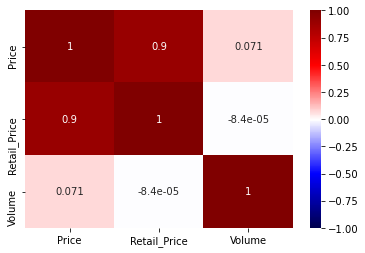

In [21]:
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

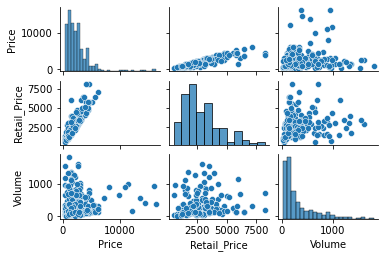

In [13]:
sns.pairplot(df, height=1.2, aspect=1.5);

In [23]:
df2 = df.loc[:,['Brand', 'Price', 
                'Condition', 'Volume', 'Exterior Color',
               'Exterior Material', 'Interior Color', 
                'Interior Material', 'Accessories']]

In [27]:
df2 = df2.dropna()

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, Chanel Boy Flap Bag Quilted Caviar Old Medium to Gucci Vintage Cut Out Handle Chain Bag Web Canvas
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              791 non-null    object 
 1   Price              791 non-null    float64
 2   Condition          791 non-null    object 
 3   Volume             791 non-null    float64
 4   Exterior Color     791 non-null    object 
 5   Exterior Material  791 non-null    object 
 6   Interior Color     791 non-null    object 
 7   Interior Material  791 non-null    object 
 8   Accessories        791 non-null    object 
dtypes: float64(2), object(7)
memory usage: 61.8+ KB


In [29]:
df.corr()

,Price,Retail_Price,Volume
Price,1.000000,0.900594,0.070830
Retail_Price,0.900594,1.000000,-0.000084
Volume,0.070830,-0.000084,1.000000
